In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  

In [3]:
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [4]:
# variable information 
print(wine_quality.variables) 

                    name     role         type demographic  \
0          fixed_acidity  Feature   Continuous        None   
1       volatile_acidity  Feature   Continuous        None   
2            citric_acid  Feature   Continuous        None   
3         residual_sugar  Feature   Continuous        None   
4              chlorides  Feature   Continuous        None   
5    free_sulfur_dioxide  Feature   Continuous        None   
6   total_sulfur_dioxide  Feature   Continuous        None   
7                density  Feature   Continuous        None   
8                     pH  Feature   Continuous        None   
9              sulphates  Feature   Continuous        None   
10               alcohol  Feature   Continuous        None   
11               quality   Target      Integer        None   
12                 color    Other  Categorical        None   

               description units missing_values  
0                     None  None             no  
1                     None  Non

In [19]:
X.shape

(6497, 11)

In [20]:
y.shape

(6497, 1)

In [24]:
X.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8


In [25]:
y.head(2)

,quality
0,5
1,5


In [5]:
X.info()
# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


In [6]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   quality  6497 non-null   int64
dtypes: int64(1)
memory usage: 50.9 KB


In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\SUJATA\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


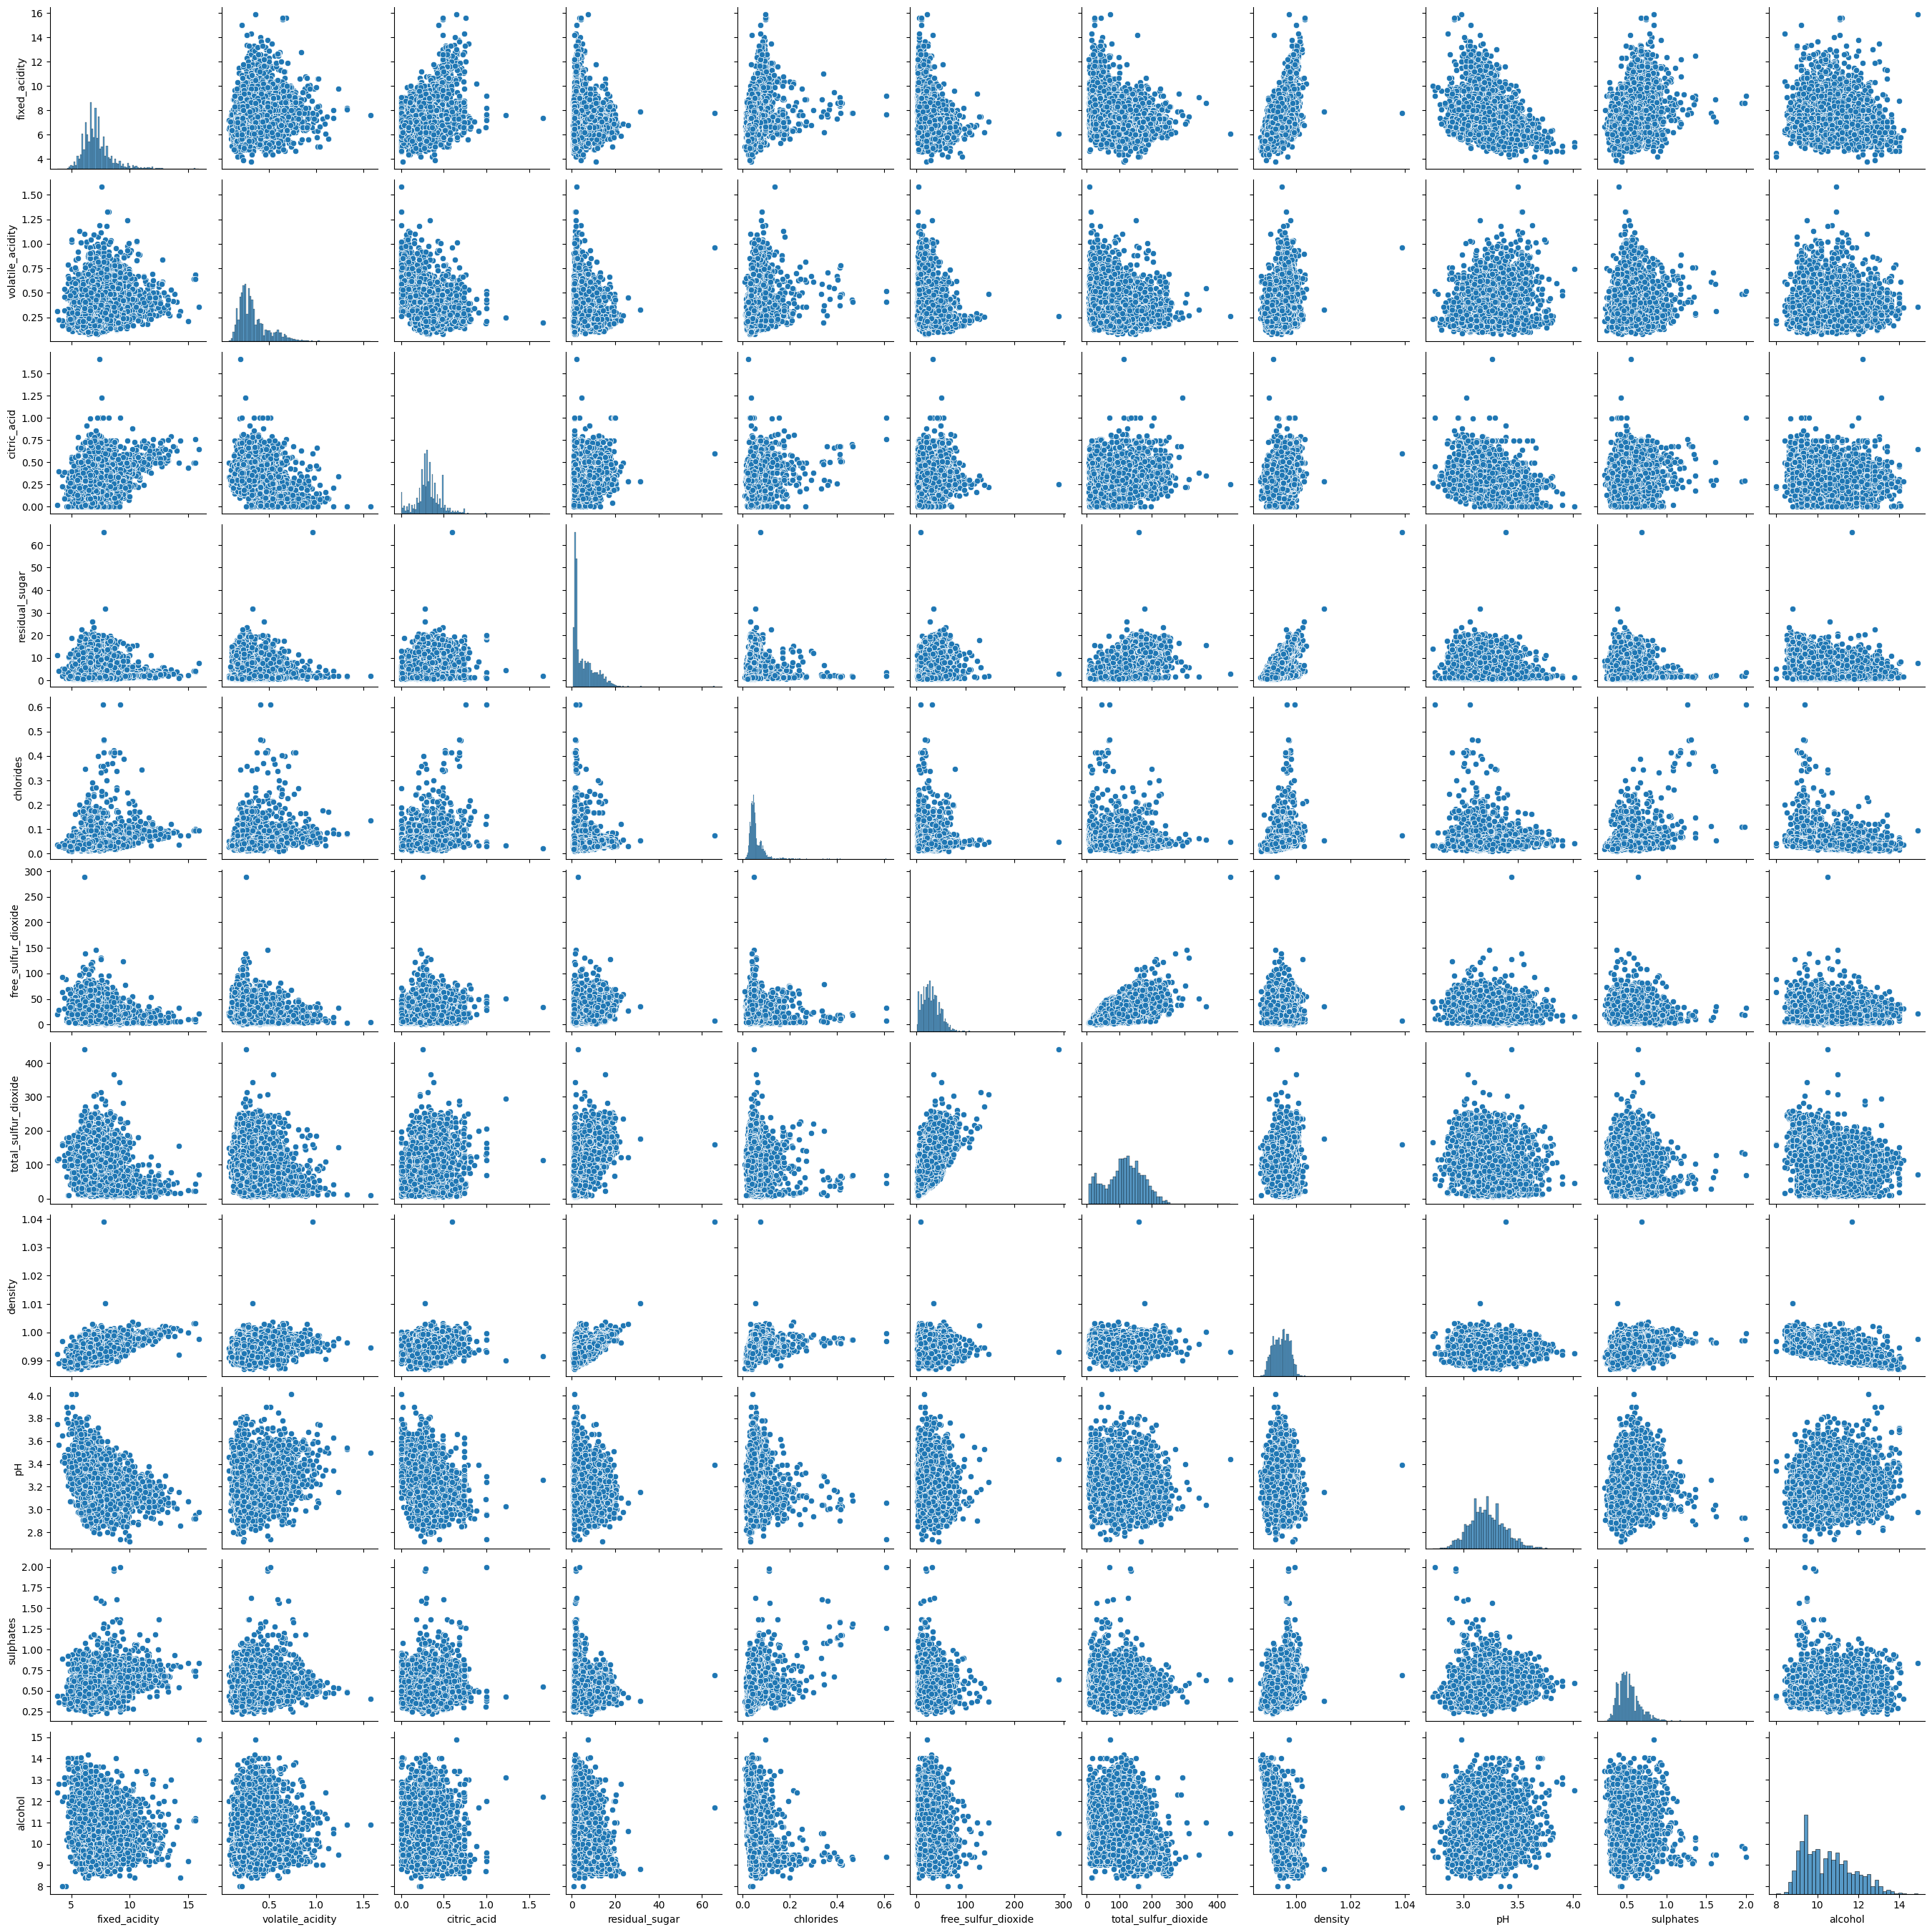

In [8]:
# multidependency of feture variables
sns.pairplot(X)

In [29]:
for i in X:
    print(i,"    ", X[i].corr(y["quality"]))

fixed_acidity      -0.07674320790961986
volatile_acidity      -0.2656994776114678
citric_acid      0.08553171718367844
residual_sugar      -0.03698048458576946
chlorides      -0.20066550043510198
free_sulfur_dioxide      0.055463058616632664
total_sulfur_dioxide      -0.041385453855608795
density      -0.3058579060694141
pH      0.019505703714435902
sulphates      0.038485445876514444
alcohol      0.44431852000751754


In [30]:
X["alcohol"].corr(X["density"]), X["fixed_acidity"].corr(X["density"])

(-0.6867454216813399, 0.4589099822804345)

In [33]:
import statsmodels.api as sm
X=sm.add_constant(X) #statsmodel lobarary
X.head(3)

,const,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,1.0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,1.0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,1.0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


In [34]:
y.shape, X.shape

((6497, 1), (6497, 12))

In [35]:
model_sm=sm.OLS(y,X).fit()
print(model_sm.summary2())

                    Results: Ordinary least squares
Model:                 OLS               Adj. R-squared:      0.291     
Dependent Variable:    quality           AIC:                 14454.9017
Date:                  2024-07-21 20:16  BIC:                 14536.2508
No. Observations:      6497              Log-Likelihood:      -7215.5   
Df Model:              11                F-statistic:         243.3     
Df Residuals:          6485              Prob (F-statistic):  0.00      
R-squared:             0.292             Scale:               0.54071   
------------------------------------------------------------------------
                      Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
------------------------------------------------------------------------
const                 55.7627  11.8939   4.6883 0.0000  32.4468  79.0787
fixed_acidity          0.0677   0.0156   4.3462 0.0000   0.0372   0.0982
volatile_acidity      -1.3279   0.0774 -17.1623 0.0000  -1.4796  -1.1762

In [36]:
model_sm.rsquared

0.29213688504107915

In [83]:
from sklearn import linear_model
regression_model=linear_model.LinearRegression()
regression_model.fit(X=pd.DataFrame(X["alcohol"]),y=y["quality"])
# from trained model
print("intercept:", regression_model.intercept_)
print("Coeff:", regression_model.coef_)

intercept: 2.4052686015530496
Coeff: [0.32531204]


In [84]:
#Check for R^2 value
regression_model.score(X=pd.DataFrame(X["alcohol"]),y=y)

0.19741894722167097

In [85]:
pred=regression_model.predict(X=[[2],[4],[8],[10]])
print(pred)

[3.05589268 3.70651675 5.00776491 5.65838898]


C:\Users\SUJATA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [86]:
train_prediction=regression_model.predict(X=pd.DataFrame(X["alcohol"]))
print(train_prediction)

[5.46320176 5.59332657 5.59332657 ... 5.46320176 6.56926269 6.24395065]


In [87]:
Wine_WM=X[["alcohol"]]
Wine_WM["quality"]=y["quality"]
Wine_WM['Predicted quality']=pd.DataFrame(train_prediction)

C:\Users\SUJATA\AppData\Local\Temp\ipykernel_17372\2908780505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wine_WM["quality"]=y["quality"]
C:\Users\SUJATA\AppData\Local\Temp\ipykernel_17372\2908780505.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wine_WM['Predicted quality']=pd.DataFrame(train_prediction)


In [88]:
Wine_WM.head(2)

,alcohol,quality,Predicted quality
0,9.4,5,5.463202
1,9.8,5,5.593327


C:\Users\SUJATA\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


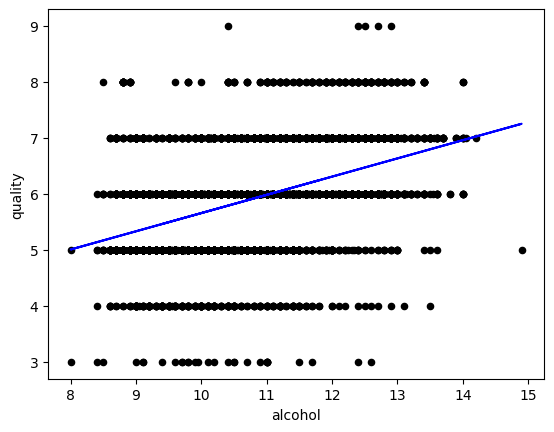

In [89]:
Wine_WM.plot(kind="scatter", x="alcohol", y="quality", color="black")
plt.plot(Wine_WM["alcohol"],train_prediction, color="blue")

In [90]:
error_sm=model_sm.resid
error_sm
print(round(sum(error_sm**2),2))

3506.53


<Axes: ylabel='Density'>

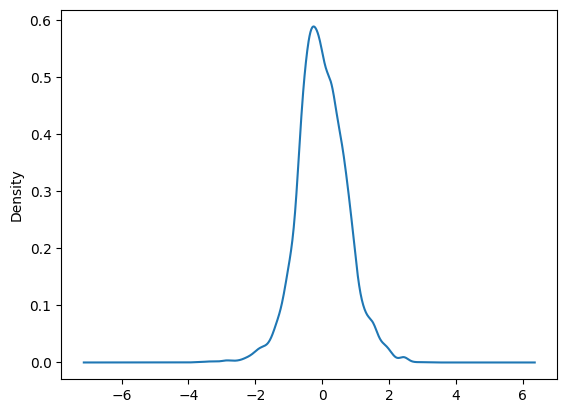

In [91]:
error_sm.plot(kind="kde")

In [95]:
residuals=y["quality"]-train_prediction
data=pd.DataFrame()
data["actual_y"]=y["quality"]
data["predicted_y"]=pd.DataFrame(train_prediction)
data["error1"]=pd.DataFrame(error_sm)
data["error2"]=pd.DataFrame(residuals)
print(data)

      actual_y  predicted_y    error1    error2
0            5     5.463202  0.002393 -0.463202
1            5     5.593327  0.075007 -0.593327
2            5     5.593327 -0.034663 -0.593327
3            6     5.593327  0.319667  0.406673
4            5     5.463202  0.002393 -0.463202
...        ...          ...       ...       ...
6492         6     6.048763 -0.168984 -0.048763
6493         5     5.528264 -0.608278 -0.528264
6494         6     5.463202  0.580639  0.536798
6495         7     6.569263  0.567344  0.430737
6496         6     6.243951 -0.205727 -0.243951

[6497 rows x 4 columns]


In [96]:
# Polynomial Regression Analysis
poly_model = linear_model.LinearRegression()
predictors_X=pd.DataFrame([X["alcohol"],
                          X["alcohol"]**2,
                          X["alcohol"]**3,
                          X["alcohol"]**4,
                          X["alcohol"]**5,
                          X["alcohol"]**6]).T
#include weight squired, T- transpose(columnwise to rowwise)
poly_model.fit(X=predictors_X, y=y["quality"])

print("intercept:",poly_model.intercept_)
print("coeff:",poly_model.coef_)
print("Model Accuracy:", poly_model.score(X=predictors_X, y=y["quality"]))


intercept: -5771.64285675824
coeff: [ 3.19556879e+03 -7.30580118e+02  8.83826592e+01 -5.96918936e+00
  2.13490853e-01 -3.16034896e-03]
Model Accuracy: 0.21011921045759963


C:\Users\SUJATA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\SUJATA\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


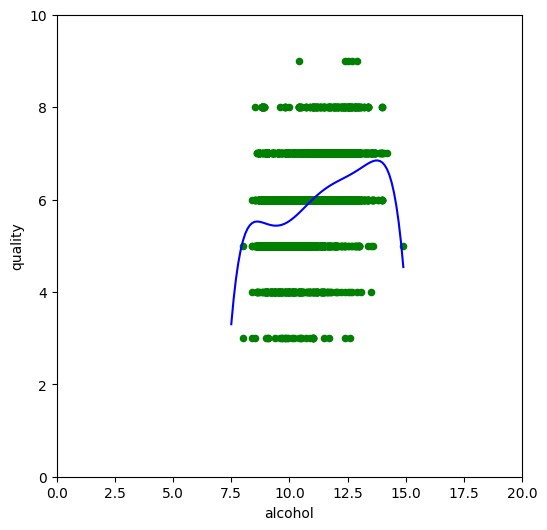

In [117]:
poly_line_range=np.arange(7.5,15,0.1)
poly_predictors=pd.DataFrame([poly_line_range,
                             poly_line_range**2,
                             poly_line_range**3,
                             poly_line_range**4,
                             poly_line_range**5,
                             poly_line_range**6]).T
y_values=poly_model.predict(X=poly_predictors)
Wine_WM.plot(kind="scatter",x="alcohol",y="quality",figsize=(6,6),color="Green",xlim=(0,20), ylim=(0,10))
plt.plot(poly_line_range,
        y_values,
        color="blue")

In [119]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

In [121]:
#spliting data into train and test
train_X, test_X, train_y, test_y=train_test_split(X,y,test_size=0.2, random_state=1000)
print(len(X))
print(train_X.shape, test_X.shape)
print(train_y.shape, test_y.shape)

6497
(5197, 12) (1300, 12)
(5197, 1) (1300, 1)


In [122]:
#fit the regression model
mlr_model=sm.OLS(train_y,train_X).fit()
mlr_model.rsquared

0.28773983451291885

In [123]:
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     190.4
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:33:22   Log-Likelihood:                -5737.8
No. Observations:                5197   AIC:                         1.150e+04
Df Residuals:                    5185   BIC:                         1.158e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   59.5343     12.965      4.592      0.000      34.117      84.952
fixed_acidity            0.0735      0.017      4.312      0.000       0.040       0.107
volatile_acidity        -1.2601      0.087    -14.473      0.000      -1.431      -1.089
citric_acid             -0.0113      0.090     -0.125      0.900      -0.187       0.165
residual_sugar           0.0424      0.006      7.454      0.000       0.031       0.054
chlorides               -0.6458      0.365     -1.771      0.077      -1.361       0.069
free_sulfur_dioxide      0.0065      0.001      7.694      0.000       0.005       0.008
total_sulfur_dioxide    -0.0027      0.000     -8.703      0.000      -0.003      -0.002
density                -58.7433     13.231     -4.440      0.000     -84.681     -32.806
pH                       0.4710      0.099      4.754      0.000       0.277       0.665
sulphates                0.7246      0.084      8.586      0.000       0.559       0.890
alcohol                  0.2517      0.018     13.833      0.000       0.216       0.287
==============================================================================
Omnibus:                      116.780   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.436
Skew:                          -0.056   Prob(JB):                     1.25e-56
Kurtosis:                       4.085   Cond. No.                     2.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: >

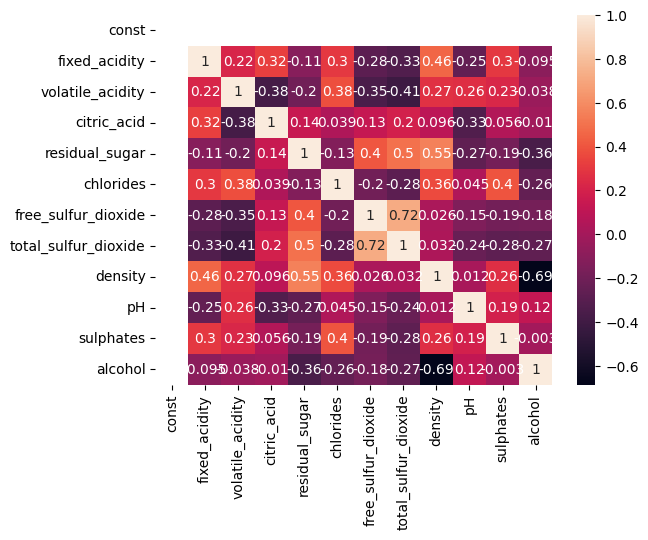

In [125]:
corr=X.corr()
sns.heatmap(corr, annot=True)

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#vif is used for finding corrilated variables
def calc_vif(X):
    vif=pd.DataFrame()
    vif['Variables']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [127]:
calc_vif(X)

,Variables,VIF
0,const,1.699783e+06
1,fixed_acidity,4.896925e+00
2,volatile_acidity,1.949413e+00
3,citric_acid,1.608220e+00
4,residual_sugar,7.228979e+00
5,chlorides,1.631958e+00
6,free_sulfur_dioxide,2.135481e+00
7,total_sulfur_dioxide,2.937601e+00
8,density,1.591450e+01
9,pH,2.536522e+00


In [140]:
#Choosing <5 VIF values feature
X_new=X.drop(['residual_sugar','density'],axis=1)
X_new.head(2)

,const,fixed_acidity,volatile_acidity,citric_acid,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol
0,1.0,7.4,0.70,0.0,0.076,11.0,34.0,3.51,0.56,9.4
1,1.0,7.8,0.88,0.0,0.098,25.0,67.0,3.20,0.68,9.8


In [141]:
mlr_model_2=sm.OLS(y,X_new).fit()
print('MLR_Modle:', mlr_model.rsquared)
print('MLR_Modle:', mlr_model.rsquared_adj)
print('MLR_Modle_2:', mlr_model_2.rsquared)
print('MLR_Modle_2:', mlr_model_2.rsquared_adj)

MLR_Modle: 0.28773983451291885
MLR_Modle: 0.2862287714810272
MLR_Modle_2: 0.2796930301150944
MLR_Modle_2: 0.27869368330933453


In [138]:
mlr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     257.7
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:49:25   Log-Likelihood:                -7251.0
No. Observations:                6497   AIC:                         1.452e+04
Df Residuals:                    6486   BIC:                         1.460e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -33.3115      5.535     -6.018      0.000     -44.162     -22.461
fixed_acidity           -0.0276      0.011     -2.558      0.011      -0.049      -0.006
volatile_acidity        -1.5171      0.074    -20.375      0.000      -1.663      -1.371
citric_acid             -0.0948      0.080     -1.185      0.236      -0.252       0.062
chlorides               -1.1140      0.326     -3.417      0.001      -1.753      -0.475
free_sulfur_dioxide      0.0063      0.001      8.340      0.000       0.005       0.008
total_sulfur_dioxide    -0.0019      0.000     -7.081      0.000      -0.002      -0.001
density                 36.2312      5.579      6.494      0.000      25.294      47.169
pH                      -0.0535      0.069     -0.771      0.441      -0.190       0.083
sulphates                0.5580      0.072      7.715      0.000       0.416       0.700
alcohol                  0.3625      0.012     29.219      0.000       0.338       0.387
==============================================================================
Omnibus:                      142.060   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.277
Skew:                           0.027   Prob(JB):                     2.10e-69
Kurtosis:                       4.080   Cond. No.                     1.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
calc_vif(X_new)

,Variables,VIF
0,const,850.744768
1,fixed_acidity,1.778100
2,volatile_acidity,1.697220
3,citric_acid,1.600197
4,chlorides,1.549745
5,free_sulfur_dioxide,2.115429
6,total_sulfur_dioxide,2.740944
7,pH,1.379936
8,sulphates,1.346954
9,alcohol,1.292869


In [162]:
#Choosing <2 VIF values feature
X_new1=X.drop(['residual_sugar','density','free_sulfur_dioxide','total_sulfur_dioxide'],axis=1)
X_new1.head(2)

,const,fixed_acidity,volatile_acidity,citric_acid,chlorides,pH,sulphates,alcohol
0,1.0,7.4,0.70,0.0,0.076,3.51,0.56,9.4
1,1.0,7.8,0.88,0.0,0.098,3.20,0.68,9.8


In [163]:
mlr_model_2=sm.OLS(y,X_new1).fit()
print('MLR_Modle:', mlr_model.rsquared)
print('MLR_Modle:', mlr_model.rsquared_adj)
print('MLR_Modle_2:', mlr_model_2.rsquared)
print('MLR_Modle_2:', mlr_model_2.rsquared_adj)

MLR_Modle: 0.28773983451291885
MLR_Modle: 0.2862287714810272
MLR_Modle_2: 0.2707339661700603
MLR_Modle_2: 0.26994727141943464


In [164]:
mlr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     344.1
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:02:33   Log-Likelihood:                -7312.2
No. Observations:                6497   AIC:                         1.464e+04
Df Residuals:                    6489   BIC:                         1.469e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.4280      0.237     10.253      0.000       1.964       2.892
fixed_acidity        0.0076      0.009      0.858      0.391      -0.010       0.025
volatile_acidity    -1.4568      0.072    -20.182      0.000      -1.598      -1.315
citric_acid         -0.0987      0.079     -1.256      0.209      -0.253       0.055
chlorides           -0.8755      0.322     -2.716      0.007      -1.507      -0.244
pH                   0.0967      0.066      1.456      0.145      -0.033       0.227
sulphates            0.6447      0.072      8.939      0.000       0.503       0.786
alcohol              0.3105      0.008     38.055      0.000       0.294       0.326
==============================================================================
Omnibus:                      123.532   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.656
Skew:                           0.022   Prob(JB):                     6.82e-57
Kurtosis:                       3.976   Cond. No.                         465.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
#Residual Analysis

In [166]:
mlr_model.resid

3545    0.287659
726     0.505760
5482   -0.358532
3389   -0.383515
3548   -0.345103
          ...   
2398    1.747630
3776    1.794869
6215   -0.955992
4695    0.673520
1459    0.384969
Length: 5197, dtype: float64

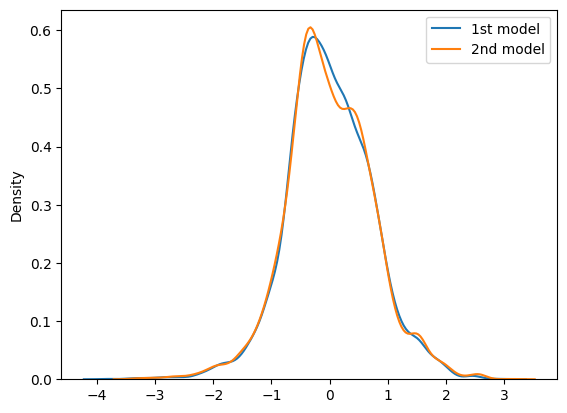

In [167]:
#extracting residual values for both modules

Residual1 = mlr_model.resid
Residual2 = mlr_model_2.resid

# kde plot
sns.kdeplot(Residual1, label="1st model")
sns.kdeplot(Residual2, label="2nd model")

plt.legend()
plt.show()

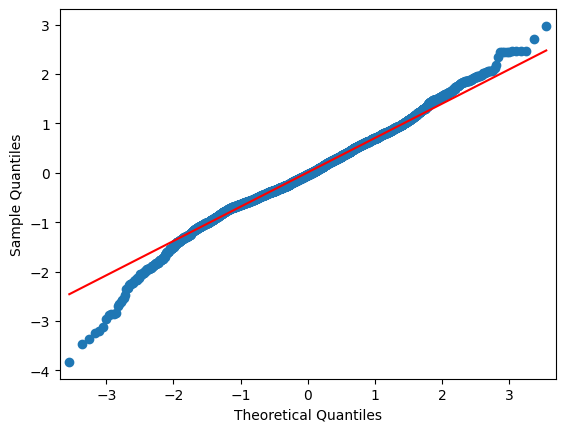

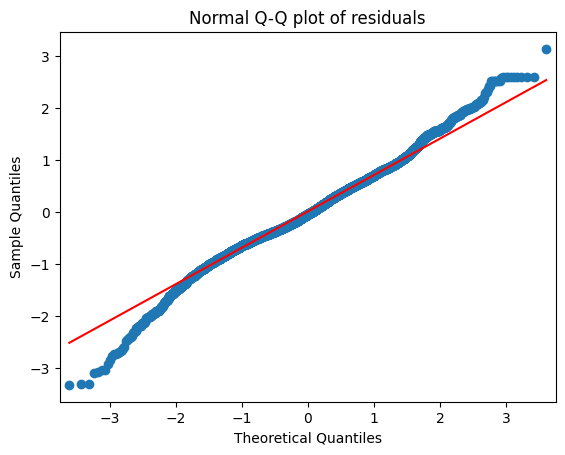

In [168]:
# QQ plot
qqplot=sm.qqplot(Residual1, line='q')
qqplot=sm.qqplot(Residual2, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

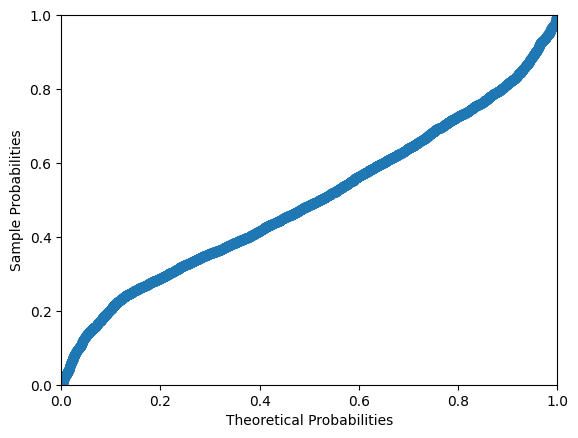

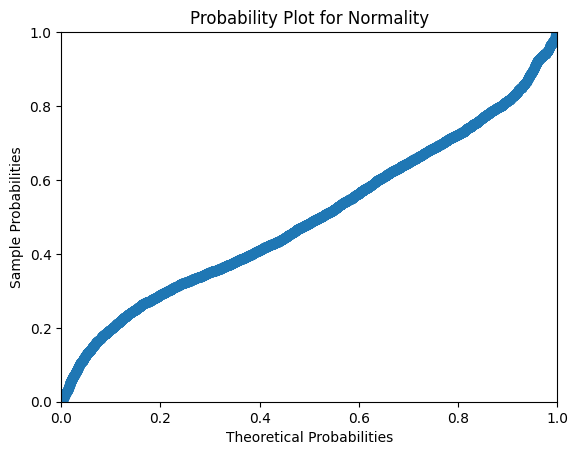

In [169]:
#pp plot
pplot=sm.ProbPlot(Residual1)
pplot1=sm.ProbPlot(Residual2)
fig=pplot.ppplot()
fig=pplot1.ppplot()
plt.title("Probability Plot for Normality")
plt.show()

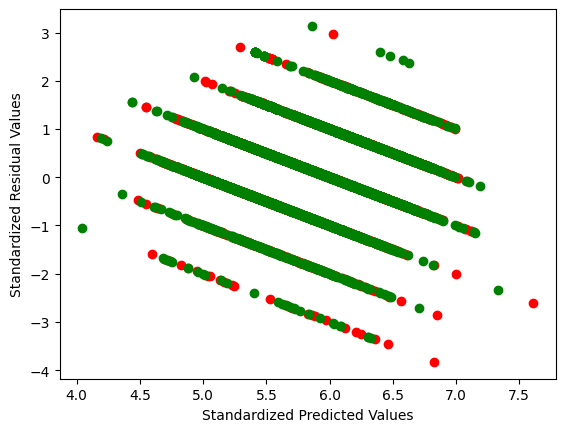

In [170]:
#Residual plot
plt.scatter(mlr_model.fittedvalues, mlr_model.resid, c='r')
plt.scatter(mlr_model_2.fittedvalues, mlr_model_2.resid, c='g')
plt.xlabel("Standardized Predicted Values")
plt.ylabel("Standardized Residual Values")
plt.show()

## Data Transformation

In [171]:
#standerdization method
def standardized_values(vals):
    return (vals-vals.mean())/vals.std()

In [172]:
X_standr=standardized_values(X_new)
print(X_standr)

      const  fixed_acidity  volatile_acidity  citric_acid  chlorides  \
0       NaN       0.142462          2.188664    -2.192664   0.569914   
1       NaN       0.451001          3.281982    -2.192664   1.197883   
2       NaN       0.451001          2.553104    -1.917405   1.026618   
3       NaN       3.073580         -0.362411     1.660957   0.541370   
4       NaN       0.142462          2.188664    -2.192664   0.569914   
...     ...            ...               ...          ...        ...   
6492    NaN      -0.783154         -0.787590    -0.197039  -0.486215   
6493    NaN      -0.474615         -0.119451     0.284664  -0.257863   
6494    NaN      -0.551750         -0.605370    -0.885185  -0.429127   
6495    NaN      -1.323097         -0.301671    -0.128224  -0.971463   
6496    NaN      -0.937423         -0.787590     0.422293  -1.028551   

      free_sulfur_dioxide  total_sulfur_dioxide        pH  sulphates   alcohol  
0               -1.100055             -1.446247  1.812

In [173]:
X_standr.describe()

,const,fixed_acidity,volatile_acidity,citric_acid,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol
count,0.0,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03
mean,NaN,9.396824e-16,-2.652262e-14,4.807301e-14,1.281157e-14,-6.367933e-17,-5.225926e-16,-3.317152e-14,-6.607989e-15,-2.235860e-14
std,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,NaN,-2.634386e+00,-1.577208e+00,-2.192664e+00,-1.342536e+00,-1.663455e+00,-1.941631e+00,-3.100376e+00,-2.091774e+00,-2.089189e+00
25%,NaN,-6.288845e-01,-6.661100e-01,-4.722972e-01,-5.147590e-01,-7.620156e-01,-6.854795e-01,-6.748102e-01,-6.805395e-01,-8.315512e-01
50%,NaN,-1.660764e-01,-3.016707e-01,-5.940918e-02,-2.578628e-01,-8.593639e-02,3.990360e-02,-5.287017e-02,-1.429263e-01,-1.608107e-01
75%,NaN,3.738663e-01,3.664680e-01,4.911081e-01,2.559297e-01,5.901428e-01,7.122099e-01,6.312639e-01,4.618885e-01,6.776148e-01
max,NaN,6.698910e+00,7.533774e+00,9.230570e+00,1.584097e+01,1.456245e+01,5.736815e+00,4.922650e+00,9.870119e+00,3.695947e+00


In [174]:
X_standr=X_standr.drop(['const'],axis=1)

In [175]:
X_standr=sm.add_constant(X_standr)
y_stdndr=standardized_values(y)
y_stdndr

,quality
0,-0.937157
1,-0.937157
2,-0.937157
3,0.207983
4,-0.937157
...,...
6492,0.207983
6493,-0.937157
6494,0.207983
6495,1.353124


In [176]:
# fit the regression model
mlr_model_3 = sm.OLS(y_stdndr,X_standr).fit()
print("MLR_model_3:", mlr_model_3.rsquared)
print("MLR_model_3:", mlr_model_3.rsquared_adj)
print("MLR_model_2:", mlr_model_2.rsquared)

MLR_model_3: 0.2796930301150946
MLR_model_3: 0.27869368330933475
MLR_model_2: 0.2707339661700603


In [177]:
min(mlr_model_3.resid), max(mlr_model_3.resid)

(-4.7904163809415685, 3.6203698724110076)

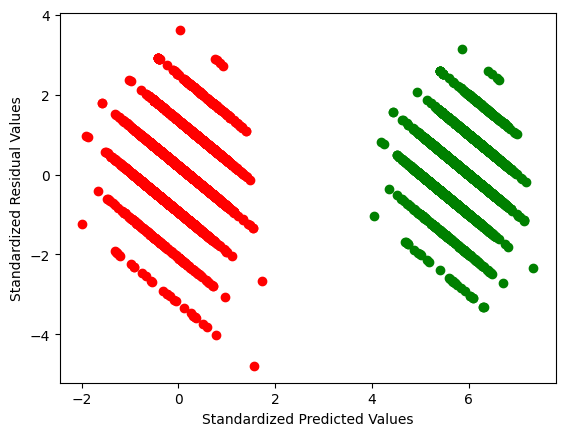

In [178]:
plt.scatter(mlr_model_3.fittedvalues, mlr_model_3.resid, c='r')
plt.scatter(mlr_model_2.fittedvalues, mlr_model_2.resid, c='g')
plt.xlabel("Standardized Predicted Values")
plt.ylabel("Standardized Residual Values")
plt.show()

## Outlier Analysis:

In [179]:
sm_model=sm.regression.linear_model.OLS(y_stdndr,X_standr).fit()
influence=sm_model.get_influence()
print(influence.cooks_distance)

(array([1.91514188e-07, 5.99229967e-07, 1.61549778e-06, ...,
       3.57079529e-05, 5.97321945e-05, 1.28983070e-05]), array([1., 1., 1., ..., 1., 1., 1.]))


In [180]:
influence_list=influence.cooks_distance[0]
print(len(influence_list))

6497


In [181]:
influence_df=pd.DataFrame(influence_list,columns=["influence"])
influence_df.index=X_standr.index
cooks_df=X_standr.merge(influence_df,left_index=True, right_index=True)
cooks_df

,const,fixed_acidity,volatile_acidity,citric_acid,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,influence
0,1.0,0.142462,2.188664,-2.192664,0.569914,-1.100055,-1.446247,1.812950,0.193082,-0.915394,1.915142e-07
1,1.0,0.451001,3.281982,-2.192664,1.197883,-0.311296,-0.862402,-0.115064,0.999502,-0.580023,5.992300e-07
2,1.0,0.451001,2.553104,-1.917405,1.026618,-0.874695,-1.092402,0.258100,0.797897,-0.580023,1.615498e-06
3,1.0,3.073580,-0.362411,1.660957,0.541370,-0.762016,-0.986248,-0.363840,0.327485,-0.580023,3.012131e-05
4,1.0,0.142462,2.188664,-2.192664,0.569914,-1.100055,-1.446247,1.812950,0.193082,-0.915394,1.915142e-07
...,...,...,...,...,...,...,...,...,...,...,...
6492,1.0,-0.783154,-0.787590,-0.197039,-0.486215,-0.367636,-0.420095,0.320294,-0.210128,0.593772,4.025637e-06
6493,1.0,-0.474615,-0.119451,0.284664,-0.257863,1.491582,0.924517,-0.426034,-0.478935,-0.747709,4.409154e-05
6494,1.0,-0.551750,-0.605370,-0.885185,-0.429127,-0.029596,-0.083942,-1.421138,-0.478935,-0.915394,3.570795e-05
6495,1.0,-1.323097,-0.301671,-0.128224,-0.971463,-0.592996,-0.101635,0.755652,-1.016548,1.935253,5.973219e-05


In [182]:
#setting the threshold and getting the outliers
original_length=len(X_standr)
cooks_threshold=4/original_length
print(cooks_threshold)

0.0006156687702016315


In [183]:
cooks_outliers=cooks_df[cooks_df["influence"]>cooks_threshold]
cooks_outliers.sort_values(by=["influence"])
print(cooks_outliers)
print("Removed:",len(cooks_outliers))
print(f"This is {cooks_threshold*100}% of our dataset")

      const  fixed_acidity  volatile_acidity  citric_acid  chlorides  \
7       1.0       0.065328          1.884965    -2.192664   0.255930   
8       1.0       0.451001          1.459786    -2.055034   0.484282   
13      1.0       0.451001          1.642006    -0.197039   1.654587   
19      1.0       0.528136         -0.119451     1.316884   8.134081   
45      1.0      -2.017309          1.095347    -1.160444  -0.058055   
...     ...            ...               ...          ...        ...   
6385    1.0      -2.171578         -0.119451     0.491108  -0.743111   
6386    1.0      -2.557251         -0.696480     0.559923  -0.743111   
6401    1.0      -1.091693         -0.362411     0.147035  -0.543303   
6403    1.0      -0.937423          0.062769     0.972811  -0.657479   
6438    1.0      -1.554501          0.396838    -1.160444  -0.514759   

      free_sulfur_dioxide  total_sulfur_dioxide        pH  sulphates  \
7               -0.874695             -1.676247  1.066622  -0.4

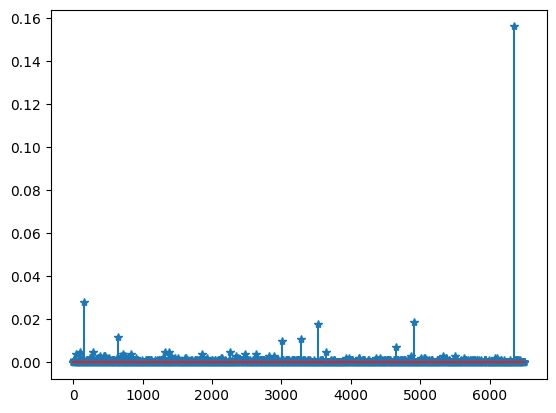

In [184]:
plt.stem(np.arange(len(X_standr)), np.round(influence_list, 3), markerfmt='*')
plt.show()

In [185]:
X_standr.shape

(6497, 10)

In [186]:
#leverage value / influencing points
K=X_standr.shape[1]
n=X_standr.shape[0]
leverage_cutoff=3*((K+1)/n)
print("Number of VAriable:",K,"and number of observations:",n)
print("Cut of leverage value:", round(leverage_cutoff,3))

Number of VAriable: 10 and number of observations: 6497
Cut of leverage value: 0.005


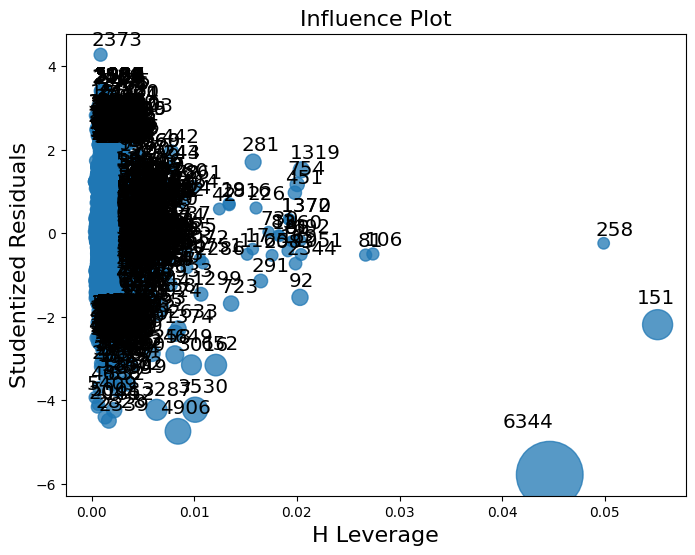

In [187]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax= plt.subplots(figsize=(8,6))
influence_plot(mlr_model_3, ax=ax)
plt.show()

## Data transformation for testing data

In [190]:
test_X=test_X.drop(['residual_sugar','density'], axis=1)

In [191]:
test_X.shape

(1300, 9)

In [197]:
test_X=standardized_values(test_X)
test_X=test_X.drop(['const'],axis=1)

In [198]:
test_X=sm.add_constant(test_X)
test_X

,const,fixed_acidity,volatile_acidity,citric_acid,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol
979,1.0,3.850669,0.606363,1.167463,0.541003,-1.470898,-1.901346,-0.552594,0.668832,-0.041465
1972,1.0,-0.043767,-0.447477,-0.306620,-0.260365,-0.010733,0.582231,-0.743566,-0.149825,-1.056410
3933,1.0,0.189899,-0.681663,0.229411,0.036438,5.289125,1.676394,1.420782,-0.695596,-1.310146
767,1.0,0.189899,1.484563,0.028399,1.372051,-0.930096,-0.303520,1.484439,0.600611,-0.802674
1062,1.0,0.579342,0.196537,0.832445,1.223649,-1.308657,-1.745037,0.529580,0.737054,0.804322
...,...,...,...,...,...,...,...,...,...,...
5316,1.0,-0.744766,-0.974397,-0.507631,-0.111963,-0.551535,0.061201,-0.679909,-0.081603,-1.056410
2496,1.0,-0.199545,-0.330383,-0.373623,-0.379086,-0.984176,-0.494564,-0.870881,-0.490932,0.043113
4239,1.0,0.112010,-0.857303,0.363418,-0.853970,-0.118893,-0.459829,-0.488937,0.532389,1.142637
2405,1.0,-0.666877,-0.213290,-0.373623,-0.319725,1.449432,1.554821,-0.297965,-0.832039,-0.718095


In [199]:
test_y=standardized_values(test_y)
test_y.shape

(1300, 1)

In [200]:
#Prediction on testing Data
y_pred=mlr_model_3.predict(test_X)
y_pred

979    -0.095898
1972   -0.399981
3933    0.104164
767    -0.798304
1062    0.332090
          ...   
5316   -0.277504
2496   -0.016164
4239    0.826462
2405   -0.303379
3170   -0.147471
Length: 1300, dtype: float64

In [206]:
test_y

,quality
979,-0.848041
1972,0.257730
3933,-0.848041
767,-0.848041
1062,0.257730
...,...
5316,0.257730
2496,0.257730
4239,0.257730
2405,-0.848041


In [211]:
#Evaluation metrics
mse=(test_y["quality"]-y_pred)**2 # Mean Absolute Error

print(f"MSE: {mse.mean():0.2f} (+/- {mse.std():0.2f})")

mae=np.abs(test_y["quality"]-y_pred) # Mean Squared Error
print(f"MAE: {mae.mean():0.2f} (+/- {mae.std():0.2f})")

rmse=np.sqrt(mse.mean()) # Root Mean Aquared Error
print(f"RMSE: {rmse:0.2f} )")

SE_line=sum((test_y["quality"]-y_pred)**2)
SE_mean=sum((test_y["quality"]-test_y["quality"].mean())**2)
r2=1-(SE_line/SE_mean)
print(f"R^2 coefficient of determination: {r2:0.2f}%")

MSE: 0.71 (+/- 1.29)
MAE: 0.65 (+/- 0.54)
RMSE: 0.84 )
R^2 coefficient of determination: 0.29%


# Linear, Lasso and Ridge regression

In [ ]:
X = wine_quality.data.features 
y = wine_quality.data.targets 

In [224]:
#spliting data into train and test
train_X, test_X, train_y, test_y=train_test_split(X,y,test_size=0.2, random_state=1000)
print(len(X))
print(train_X.shape, test_X.shape)
print(train_y.shape, test_y.shape)

6497
(5197, 12) (1300, 12)
(5197, 1) (1300, 1)


In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import sklearn.cross_decomposition as cv
import sklearn

In [237]:
#Linear regression
LR=LinearRegression()
LR.fit(train_X, train_y['quality'])
train_score_LR=LR.score(train_X, train_y['quality'])
print("The train score for lasso model is {}".format(train_score_LR))

The train score for lasso model is 0.2877398345129186


In [238]:
# Lasso regression model
print("\n ................Lasso Model......................")
lasso=Lasso(alpha=0.1)
lasso.fit(train_X, train_y['quality'])
train_score_ls = lasso.score(train_X, train_y['quality'])
print("The train score for lasso model is {}".format(train_score_ls))


 ................Lasso Model......................
The train score for lasso model is 0.21033954946958955


In [239]:
#Ridege regression model
print("\n Ridge Model...........................\n")
ridgeReg=Ridge(alpha=0.1)
ridgeReg.fit(train_X, train_y['quality'])
train_score_ridge=ridgeReg.score(train_X, train_y['quality'])
print("The train score for ridge model is {}".format(train_score_ridge))


 Ridge Model...........................

The train score for ridge model is 0.2851898201933304


In [233]:
#ElasticNet Regression Model
enet_model=ElasticNet(alpha=0.1).fit(train_X, train_y)
train_enet_score=enet_model.score(train_X, train_y)

In [240]:
# Testing a model on testing data set
LR_test_score=LR.score(test_X,test_y['quality'])
lasso_test_score=lasso.score(test_X,test_y['quality'])
Ridge_test_score=ridgeReg.score(test_X,test_y['quality'])
enet_test_score=enet_model.score(test_X,test_y['quality'])
result=pd.DataFrame({'LR score':[train_score_LR,LR_test_score],
                    'Lasso score':[train_score_ls,lasso_test_score],
                    'Ridege score':[train_score_ridge,Ridge_test_score],
                     'Enet score':[train_enet_score, enet_test_score]},
                   index=["Train Score", "Test Score"])
print(result)

             LR score  Lasso score  Ridege score  Enet score
Train Score   0.28774     0.210340      0.285190    0.218270
Test Score    0.30250     0.207396      0.301983    0.219385


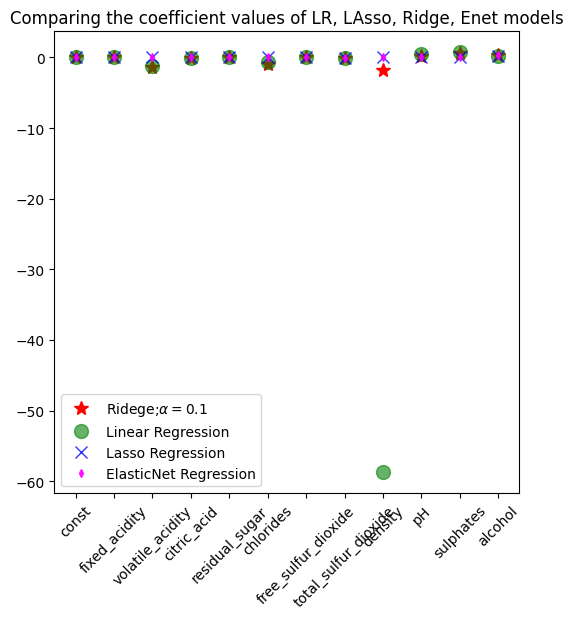

In [249]:
#Lets plot the coefficients for both the linear and ridge models.
plt.figure(figsize=(6,6))
plt.plot(X.columns, ridgeReg.coef_,alpha=1,linestyle='none',
        marker='*',markersize=10, color='red',label=r'Ridege;$\alpha=0.1$',zorder=1)

plt.plot(X.columns, LR.coef_,alpha=0.6,linestyle='none',
        marker='o',markersize=10, color='green',label='Linear Regression')

plt.plot(X.columns, lasso.coef_,alpha=0.8,linestyle='none',
        marker='x',markersize=8, color='blue',label='Lasso Regression')

plt.plot(X.columns, enet_model.coef_,alpha=0.9,linestyle='none',
        marker='d',markersize=4, color='magenta',label='ElasticNet Regression')

plt.xticks(rotation=45)
plt.title("Comparing the coefficient values of LR, LAsso, Ridge, Enet models")
plt.legend()
plt.show()

In [250]:
# Using Cross Validation

In [251]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

In [256]:
#Lasso Cross Validation
from sklearn.linear_model import LassoCV, RidgeCV,ElasticNetCV
lasso_cv=LassoCV(alphas=[0.0001, 0.0002, 0.0009,0.001,0.002,0.003,0.0035,0.0003,0.01,0.1,1,10],
                random_state=10).fit(train_X,train_y['quality'])
print(f'training score:{lasso_cv.score(train_X,train_y)}')
print(lasso_cv.alpha_)

training score:0.28501337343342525
0.0001


In [258]:
#Ridge Cross Validation
#Using the linear CV model
from sklearn.linear_model import RidgeCV
#Ridge Cross validation
ridge_cv = RidgeCV(alphas = [0.0001,0.002, 0.001,0.01,0.02, 0.1, 1, 10,10.5,11,12,15,17,19,50,100,150],
                    ).fit(train_X,train_y['quality'])
#score
print("The train score for ridge model is {}".format(ridge_cv.score(train_X,train_y)))
print(ridge_cv.alpha_)

The train score for ridge model is 0.287737106157109
0.0001


In [259]:
#Using the ElasticNetCV CV model
from sklearn.linear_model import ElasticNetCV

#ElasticNetCV Cross validation
ElasticNet_cv = ElasticNetCV(alphas = [0.0001, 0.001,0.002,0.0025,0.003,0.035,0.01, 0.1, 1, 10]).fit(train_X,train_y['quality'])

#score
print("The train score for elasticnetCV model is {}".format(ElasticNet_cv.score(train_X,train_y)))
ElasticNet_cv.alpha_

The train score for elasticnetCV model is 0.2850168647264629


0.0001

In [260]:
alpha = np.logspace(-4,-1,10)
np.empty_like(alpha)

array([-4.        , -3.66666667, -3.33333333, -3.        , -2.66666667,
       -2.33333333, -2.        , -1.66666667, -1.33333333, -1.        ])

In [261]:
print(alpha)

[0.0001     0.00021544 0.00046416 0.001      0.00215443 0.00464159
 0.01       0.02154435 0.04641589 0.1       ]


In [271]:
alphas = np.logspace(-8, 2, 20)
scores = np.empty_like(alphas)
for i,a in enumerate(alphas): 
    lasso = Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(train_X, train_y["quality"])
    scores[i] = lasso.score(train_X, train_y["quality"])
print(scores)
print(alphas)

[0.28773983 0.28773983 0.28773981 0.28773951 0.28773614 0.28769807
 0.28726849 0.28502755 0.28498309 0.28449034 0.28321823 0.27740809
 0.24815207 0.21714639 0.16093042 0.00994388 0.         0.
 0.         0.        ]
[1.00000000e-08 3.35981829e-08 1.12883789e-07 3.79269019e-07
 1.27427499e-06 4.28133240e-06 1.43844989e-05 4.83293024e-05
 1.62377674e-04 5.45559478e-04 1.83298071e-03 6.15848211e-03
 2.06913808e-02 6.95192796e-02 2.33572147e-01 7.84759970e-01
 2.63665090e+00 8.85866790e+00 2.97635144e+01 1.00000000e+02]


C:\Users\SUJATA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.002042389131233514


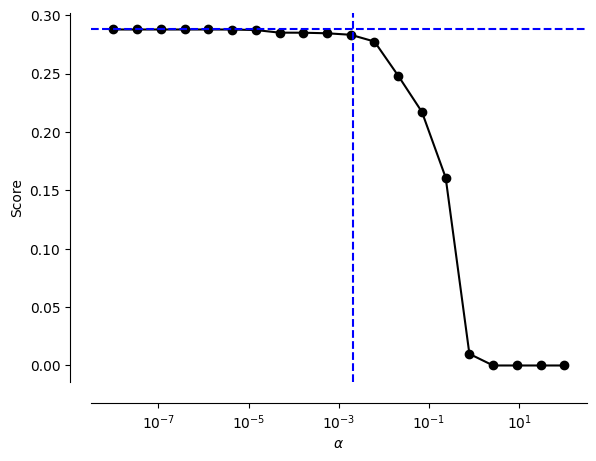

In [272]:
# comparing alpha values with scores
lassocv = LassoCV(random_state=0)
lassocv.fit(X, y,)
lassocv_score = lassocv.score(X, y)
lassocv_alpha = lassocv.alpha_
print(lassocv_alpha)
plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color='b', ls='--')
plt.axvline(lassocv_alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
sns.despine(offset=15)

In [273]:
# Model Tuning

In [274]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
alphas = np.logspace(-3, 6, num=30)
model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
cv_results = cross_validate(model,train_X,train_y["quality"], return_estimator=True, n_jobs=2) 
print(cv_results)

{'fit_time': array([0.06248713, 0.04686308, 0.03123975, 0.03124261, 0.03124213]), 'score_time': array([0.        , 0.01562095, 0.        , 0.        , 0.01562095]), 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-03, 2.04335972e-03, 4.17531894e-03, 8.53167852e-03,
       1.74332882e-02, 3.56224789e-02, 7.27895384e-02, 1.48735211e-01,
       3.03919538e-01, 6.21016942e-01, 1.26896100e+00, 2.59294380e+00,
       5.29831691e+00, 1.08263673e+01, 2.21221629e+01, 4.52035366e+01,
       9.23670857e+01, 1.88739182e+02, 3.85662042e+02, 7.88046282e+02,
       1.61026203e+03, 3.29034456e+03, 6.72335754e+03, 1.37382380e+04,
       2.80721620e+04, 5.73615251e+04, 1.17210230e+05, 2.39502662e+05,
       4.89390092e+05, 1.00000000e+06])))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-03, 2.04335972e-03, 4.17531894e-

In [275]:
score = cv_results["test_score"]
print(score)
print(f"R2 score: {score.mean():.3f} ± {score.std():.3f}")

[0.27994795 0.25659239 0.28970596 0.30602982 0.28430594]
R2 score: 0.283 ± 0.016


In [276]:
from sklearn.preprocessing import Normalizer
alphas = np.logspace(-3, 6, num=30)
model = make_pipeline(Normalizer(), ElasticNetCV(alphas=alphas))
cv_results = cross_validate(model,train_X,train_y["quality"], return_estimator=True, n_jobs=2) 
print(cv_results)

{'fit_time': array([0.10654998, 0.05382156, 0.12088752, 0.07488561, 0.0667603 ]), 'score_time': array([0.01075029, 0.00399232, 0.00398278, 0.01854396, 0.00405622]), 'estimator': [Pipeline(steps=[('normalizer', Normalizer()),
                ('elasticnetcv',
                 ElasticNetCV(alphas=array([1.00000000e-03, 2.04335972e-03, 4.17531894e-03, 8.53167852e-03,
       1.74332882e-02, 3.56224789e-02, 7.27895384e-02, 1.48735211e-01,
       3.03919538e-01, 6.21016942e-01, 1.26896100e+00, 2.59294380e+00,
       5.29831691e+00, 1.08263673e+01, 2.21221629e+01, 4.52035366e+01,
       9.23670857e+01, 1.88739182e+02, 3.85662042e+02, 7.88046282e+02,
       1.61026203e+03, 3.29034456e+03, 6.72335754e+03, 1.37382380e+04,
       2.80721620e+04, 5.73615251e+04, 1.17210230e+05, 2.39502662e+05,
       4.89390092e+05, 1.00000000e+06])))]), Pipeline(steps=[('normalizer', Normalizer()),
                ('elasticnetcv',
                 ElasticNetCV(alphas=array([1.00000000e-03, 2.04335972e-03, 4.175318

In [277]:
score = cv_results["test_score"]
print(score)
print(f"R2 score: {score.mean():.3f} ± {score.std():.3f}")

[0.03628094 0.03290603 0.03651691 0.03999781 0.02968144]
R2 score: 0.035 ± 0.004


In [278]:
from sklearn.preprocessing import Normalizer
alphas = np.logspace(-3, 6, num=30)
model = make_pipeline(StandardScaler(), ElasticNetCV(alphas=alphas))
cv_results = cross_validate(model,train_X,train_y["quality"], return_estimator=True, n_jobs=2) 
score = cv_results["test_score"]
print(score)
print(f"R2 score: {score.mean():.3f} ± {score.std():.3f}")

[0.28040645 0.2563589  0.28952421 0.30601978 0.28441999]
R2 score: 0.283 ± 0.016
